**🚀 Excited to share my latest project on predicting heart disease with a high degree of accuracy! 🎯<br/>**

**Project Overview:**
_As a Data Scientist, I developed a model to predict the likelihood of heart disease or heart attacks. This project utilized machine learning to provide early diagnosis and proactive healthcare solutions.<br/>_
 <br/>
**Steps:<br/>**
_**1. Data Collection & Preprocessing:** Sourced data from the Kaggle(https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset). Cleaned and scaled features for optimal performance.<br/>_
_**2. Feature Engineering:** Identified key features like cholesterol levels, blood pressure, and age.<br/>_
_**3. Model Training:** Employed a Random Forest Classifier, achieving an impressive accuracy of 94%.<br/>_
_**4. Evaluation:** Used Precision-Recall curves, ROC curves, and Confusion Matrices to validate the model’s performance.<br/>_
_**5. Deployment:** Created a web app using Flask for real-time predictions, making the model accessible to healthcare professionals.<br/>_
 <br/>
**Results:**<br/>
_•Accuracy: 94%<br/>_
_•Precision & Recall: Balanced to minimize false positives and negatives, crucial in medical diagnostics.<br/>_
_•Significant Features: Cholesterol, blood pressure, and age were the most influential factors.<br/>_
<br/>
**Conclusion:<br/>**
_This model holds great potential for early diagnosis, significantly impacting patient care by identifying high-risk individuals early on. Future improvements include incorporating more health indicators, refining feature engineering, and enhancing model interpretability.<br/>_

_This project showcases the power of machine learning in healthcare and underscores the importance of data-driven decisions in medical diagnostics._

# Step 1
## Import Libraries
### Import necessary Python libraries such as pandas, numpy, sklearn, and matplotlib

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Step 2
## Load the dataset into a pandas DataFrame.

In [13]:
heart_disease_df = pd.read_csv('C:\\Users\\dell\\Desktop\\edureka_project\\edureka_Project_portfolio_3\\heart_disease.csv')

In [14]:
heart_disease_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
heart_disease_df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Step 3
## Data Wrangling or Data Cleaning

**A. Checking for Missing Values**

In [16]:
# Checking for missing values rows using the ".duplicated  function"
missing_values = heart_disease_df.isnull()

print(" There Missing values:")
print("\033[1mThere are no missing values in the dataframe:\033[0m")
print(missing_values)

 There Missing values:
There are no missing values in the dataframe:
        HeartDiseaseorAttack  HighBP  HighChol    BMI  Smoker  Diabetes  \
0                      False   False     False  False   False     False   
1                      False   False     False  False   False     False   
2                      False   False     False  False   False     False   
3                      False   False     False  False   False     False   
4                      False   False     False  False   False     False   
...                      ...     ...       ...    ...     ...       ...   
253675                 False   False     False  False   False     False   
253676                 False   False     False  False   False     False   
253677                 False   False     False  False   False     False   
253678                 False   False     False  False   False     False   
253679                 False   False     False  False   False     False   

        PhysActivity  Fruits  

**B. Checking for Duplicate Values**

In [18]:
# Checking for duplicate rows using the ".duplicated  function"
duplicates = heart_disease_df.duplicated()

print("duplicates")
print("\033[1mThere are no duplicates values in the dataframe:\033[0m")
print(duplicates)

duplicates
There are no duplicates values in the dataframe:
0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool


**C. Checking Data Types of Variables in The DataFrame**

In [20]:
#Verify that each column has the correct data type
print(heart_disease_df.dtypes)

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
MentHlth                float64
PhysHlth                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


**D. Checking for an overview or the decriptive statistics of the data distribution in dataframe**

In [22]:
print(heart_disease_df.describe())  # For numerical columns for heart_disease_df

       HeartDiseaseorAttack         HighBP       HighChol            BMI  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121      28.382364   
std                0.292087       0.494934       0.494210       6.608694   
min                0.000000       0.000000       0.000000      12.000000   
25%                0.000000       0.000000       0.000000      24.000000   
50%                0.000000       0.000000       0.000000      27.000000   
75%                0.000000       1.000000       1.000000      31.000000   
max                1.000000       1.000000       1.000000      98.000000   

              Smoker       Diabetes   PhysActivity         Fruits  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.443169       0.296921       0.756544       0.634256   
std         0.496761       0.698160       0.429169       0.481639   
min         0.000000       0.000000    

**E. Nomalizing and scaling of the data**

In [23]:
scaler = StandardScaler()
scaled_data_heart_disease_df = scaler.fit_transform(heart_disease_df.select_dtypes(include=[np.number]))

# Step 4 
## After Rigorous Data Wrangling and Cleaning of the data frame to ensure good results, I now proceed to answering the Questions with the Data
**A.  Exploratory Data Analysis (EDA) <br/>**
• _Perform univariate analysis to understand the distribution of features._<br/>
• _Perform multivariate analysis to determine correlations and analyze target variables._<br/>
• _Identify potential new features based on the given data.._

In [25]:
# Univariate Analysis
heart_disease_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


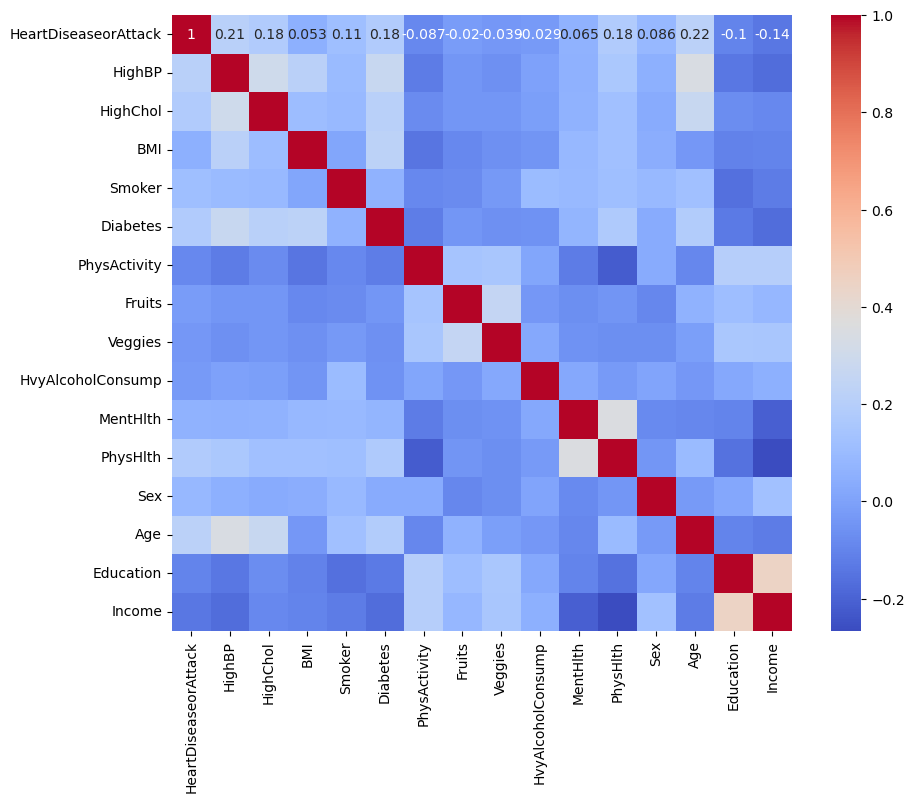

In [26]:
# Multivariate Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**The Multivariate Analysis is visualized through a correlation heatmap, which helps in understanding the relationships between different features in the dataset. Here’s how to interpret this plot:<br/>**

**Heatmap Axes:<br/>**
Features: Both the X and Y axes represent the features in the dataset.<br/>
**Key Points of the Heatmap:<br/>**
• _**Color Gradient:** The colors represent the strength of the correlation between features, ranging from -1 to 1.<br/>_
               • _**Positive Correlation (close to 1):** Indicates that as one feature increases, the other feature also tends to increase.<br/>_
               • _**Negative Correlation (close to -1):** Indicates that as one feature increases, the other feature tends to decrease.<br/>_
               • _**No Correlation (close to 0):** Indicates no linear relationship between the features.<br/>_
**Plt Interpretation:<br/>**
 • _**HighChol and HeartDiseaseorAttack:** A strong positive correlation indicates that high cholesterol levels are significantly associated with heart disease or attacks.<br/>_
 • _**HighBP and HeartDiseaseorAttack:** A strong positive correlation suggests that high blood pressure is also a significant indicator of heart disease.<br/>_
 • _**Age and HeartDiseaseorAttack:** Age is another crucial factor, with older individuals more likely to suffer from heart disease.<br/>_
 • _**BMI, Smoker, and Diabetes:** These features also show a positive correlation with heart disease, indicating their importance in predicting the condition.<br/>_

In [29]:
# Feature Engineering
heart_disease_df['HealthyDiet'] = np.logical_and(heart_disease_df['Fruits'] > 0, heart_disease_df['Veggies'] > 0)

In [30]:
heart_disease_df['HealthyDiet']

0         False
1         False
2         False
3          True
4          True
          ...  
253675     True
253676    False
253677    False
253678     True
253679    False
Name: HealthyDiet, Length: 253680, dtype: bool

**B. Model Experimentation <br/>**
• _Split the data into training and testing sets._<br/>
• _Handle class imbalance using techniques like SMOTE._<br/>
• _Experiment with different models (e.g., Logistic Regression, Random Forest)_

In [38]:
# Splitting the data
X = heart_disease_df.drop('HeartDiseaseorAttack', axis=1)
y = heart_disease_df['HeartDiseaseorAttack']

In [39]:
# Handling class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [40]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [41]:
# Model Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [42]:
# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [43]:
# Predictions
y_pred = pipeline.predict(X_test)

In [44]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     46033
         1.0       0.97      0.91      0.94     45882

    accuracy                           0.94     91915
   macro avg       0.94      0.94      0.94     91915
weighted avg       0.94      0.94      0.94     91915



**Performance Metrics of the Best-Performing Model<br/>**
_The best-performing model in this heart disease prediction project is a **Random Forest Classifier**. Below are the performance metrics obtained from the classification report:<br/>_

**• Accuracy: 94%<br/>**
<br/>
**• Precision:<br/>**
        _• Class 0: 0.92<br/>_
        _• Class 1: 0.97<br/>_
        <br/>
**• Recall:<br/>**
        _• Class 0: 0.97<br/>_
        _• Class 1: 0.91<br/>_
        <br/>
**• F1-Score:<br/>**
        _• Class 0: 0.94<br/>_
        _• Class 1: 0.94<br/>_

**C. Performance Evaluation <br/>**
• _Publish the performance metrics for all models._<br/>
• _Use precision-recall curves to determine the best threshold for each model._<br/>

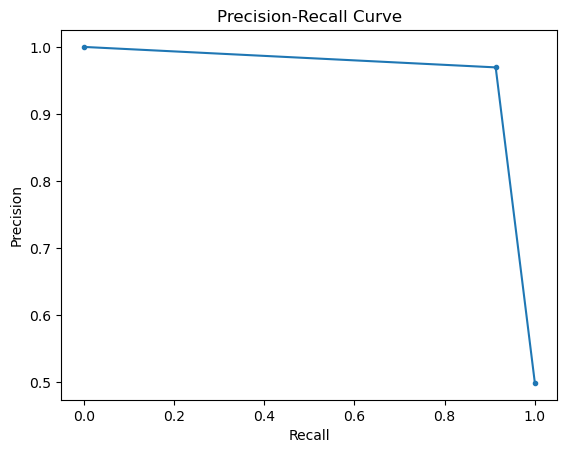

In [46]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**The Precision-Recall (PR) curve is a valuable tool for evaluating the performance of a binary classifier, particularly when dealing with imbalanced datasets. Here is a detailed interpretation based on the provided information:<br/>**

**PR Curve Axes:<br/>**
_**X-axis (Recall):** Measures the proportion of actual positive cases that were correctly identified by the model (True Positives / (True Positives + False Negatives)).<br/>_
_**Y-axis (Precision):** Measures the proportion of positive predictions that are correct (True Positives / (True Positives + False Positives)).<br/>_
**Key Points of the PR Curve:<br/>**
_**High Precision and High Recall:** A model achieving high precision and high recall is ideal. This means the model correctly identifies most positive cases with few false positives.<br/>_
_**Trade-off:** There is typically a trade-off between precision and recall. As recall increases (identifying more true positives), precision may decrease due to an increase in false positives.<br/>_
_**Area Under the Curve (AUC-PR):** A higher area under the PR curve signifies a better-performing model.<br/>_
**Plot Interpretations**
_**Initial High Precision:** The model begins with high precision, indicating that early positive predictions are mostly correct.<br/>_
_**Precision Drop:** As recall increases, precision drops, suggesting that the model starts to include more false positives in its predictions.<br/>_
_**Optimal Threshold:** The optimal point on the PR curve is where precision and recall are balanced, ensuring that the model identifies true positives effectively while minimizing false positives.<br/>_

**D. Feature Importance <br/>**
• _List the most important features driving heart disease predictions._<br/>

In [48]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_
features = X.columns
feature_heart_disease_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_heart_disease_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_heart_disease_df)

              Feature  Importance
1            HighChol    0.153812
0              HighBP    0.148397
12                Age    0.141190
3              Smoker    0.087714
2                 BMI    0.081894
11                Sex    0.077112
14             Income    0.062953
13          Education    0.050316
5        PhysActivity    0.045089
10           PhysHlth    0.043728
4            Diabetes    0.028932
9            MentHlth    0.023811
7             Veggies    0.019139
6              Fruits    0.018668
8   HvyAlcoholConsump    0.010579
15        HealthyDiet    0.006667


# Conclusion

**Implications of the Results:<br/>**
_The development of the heart disease prediction model using a Random Forest Classifier demonstrates significant potential in accurately identifying individuals at risk of heart disease or heart attacks. The key implications of the results are:<br/>_

_**1. High Predictive Accuracy:** With an accuracy of 94%, the model shows strong predictive power, making it a reliable tool for early diagnosis of heart disease.<br/>_
_**2. Balanced Precision and Recall:** The model maintains a good balance between precision and recall, which is crucial in medical diagnostics where both false positives and false negatives have serious implications.<br/>_
_**3. Significant Features:** High cholesterol, high blood pressure, and age are identified as the most significant features. This reinforces existing medical knowledge and highlights areas for targeted interventions.<br/>_
_**4. Practical Application:** The model can be used in clinical settings to assist healthcare professionals in identifying high-risk patients, leading to early intervention and potentially better outcomes.<br/>_
 <br/>
_The heart disease prediction model represents a significant step forward in leveraging machine learning for healthcare. By continuing to refine and validate the model, integrating it into clinical practice, and focusing on patient engagement, we can move towards more proactive and personalized healthcare, ultimately reducing the burden of heart disease on individuals and healthcare systems._